# Choropleth Maps in Plotly (part 1)

Author: **Marcin Sikorski**<br/>
Date: November, 2021

A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income ([Wikipedia][1]). It's a popular, readable and appealing way for visualizing geospatial data.

This simple repository aims to practice data visualizing with choropleths. We will use for this task <code>plotly</code> which is a great, open-source, easy graphing library and allows to create interactive charts. Choropleth polygons will be based on GeoJSON files - an open standard format designed for representing simple geographical features along with their non-spatial attributes.

[1]: https://en.wikipedia.org/wiki/Choropleth_map 'Wikipedia'

### Choropleth 1 - Unemployment Rate per Voivodeship

First choropleth will represent unemployment rate for August 2021. The data source is from this website - [Money][1] [Accessed 27th October 2021], which as the website says was originated from GUS (Główny Urząd Statystyczny).

[1]: https://www.money.pl/gospodarka/stopa-bezrobocia-przestala-spadac-gus-podliczyl-dane-za-sierpien-6686223144180704a.html 'Money'

In [1]:
# importing modules
import pandas as pd
import plotly.express as px

In [2]:
# geojson with voivodeships
url = r'https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/wojewodztwa/wojewodztwa-medium.geojson'

In [3]:
# loading geojson data
from urllib.request import urlopen
import json

with urlopen(url) as response:
    wojewodztwa = json.load(response)

# display properties for first element
wojewodztwa['features'][0]['properties']

{'id': 1, 'nazwa': 'śląskie'}

In [4]:
# loading pandas data
df_w = pd.read_csv('data_2021.txt', sep=',')

df_w.head()

,wojewodztwo,stopa
0,dolnośląskie,5.2
1,podkarpackie,8.4
2,lubuskie,5.4
3,śląskie,6.3
4,opolskie,4.6


In [5]:
# number of rows (voivodeships) in data frame - there should be 16 for Poland
print(len(df_w['wojewodztwo']))

# are lengths equal?
print(len(wojewodztwa['features']) == len(df_w['wojewodztwo']))

16
True


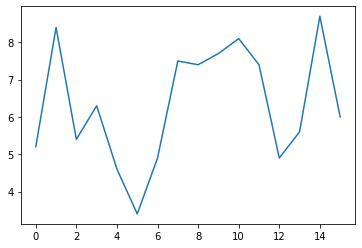

In [6]:
# overall plot on unemployment rate
df_w['stopa'].plot()

In [7]:
# extracting voivodeship names and their id's from geojson
wojew_id_map = {}

for feature in wojewodztwa['features']:
    feature['id'] = feature['properties']['id']
    wojew_id_map[feature['properties']['nazwa']] = feature['id']
    
wojew_id_map

{'śląskie': 1,
 'opolskie': 2,
 'wielkopolskie': 3,
 'zachodniopomorskie': 4,
 'świętokrzyskie': 5,
 'kujawsko-pomorskie': 6,
 'podlaskie': 7,
 'dolnośląskie': 8,
 'podkarpackie': 9,
 'małopolskie': 10,
 'pomorskie': 11,
 'warmińsko-mazurskie': 12,
 'łódzkie': 13,
 'mazowieckie': 14,
 'lubelskie': 15,
 'lubuskie': 16}

In [8]:
# create new id in data frame by matching with id from geojson
df_w['id'] = df_w['wojewodztwo'].apply(lambda x: wojew_id_map[x])

df_w.head()

,wojewodztwo,stopa,id
0,dolnośląskie,5.2,8
1,podkarpackie,8.4,9
2,lubuskie,5.4,16
3,śląskie,6.3,1
4,opolskie,4.6,2


In [9]:
# basic choropleth
fig_w = px.choropleth(data_frame=df_w,
                      geojson=wojewodztwa,
                      locations=df_w['id'],
                      color=df_w['stopa'],
                      color_continuous_scale='thermal',
                      hover_name=df_w['wojewodztwo'],
                      labels={'stopa': '[%]'},
                      height=700,
                      range_color=(0,10),
                      title='Unemployment Rate in August 2021')

# adding labels
fig_w.add_scattergeo(geojson=wojewodztwa,
                     locations=df_w['id'],
                     text=df_w['stopa'],
                     mode='text',
                     textfont={'size': 18, 'family': 'Arial'})

fig_w.update_geos(fitbounds='locations', visible=False, scope='europe')

# disable zooming and remove floating menu
config = {'scrollZoom': False, 'displayModeBar': False}

import plotly
# save to html file
plotly.offline.plot(fig_w, filename='figure_unemployment.html', config=config)

'figure_unemployment.html'

### Choropleth 2 - COVID-19 Cases per Voivodeship

Second choropleth will represent spread of COVID-19 in October 2021 per voivodeship. This dataset is provided by GUS and is updated daily. The data was downloaded from GUS's official website [GUS][1] [Accessed 1st November].

[1]: https://www.gov.pl/web/koronawirus/wykaz-zarazen-koronawirusem-sars-cov-2 'GUS'

In [10]:
import glob

# path to directory with multiple csv files
path = r'C:\Python\notebooks_jupyter\choropleths\danewojewodztwa'
all_files = glob.glob(path + '\*.csv')

list = []

for filename in all_files:
    frame = pd.read_csv(filename, index_col=None, header=0, sep=';', encoding='cp1250')
    list.append(frame)

# concatenate to data frame
df_p = pd.concat(list, axis=0, ignore_index=True)

df_p.head()

,wojewodztwo,liczba_przypadkow,liczba_na_10_tys_mieszkancow,zgony,zgony_w_wyniku_covid_bez_chorob_wspolistniejacych,zgony_w_wyniku_covid_i_chorob_wspolistniejacych,liczba_zlecen_poz,liczba_ozdrowiencow,liczba_osob_objetych_kwarantanna,liczba_wykonanych_testow,liczba_testow_z_wynikiem_pozytywnym,liczba_testow_z_wynikiem_negatywnym,liczba_pozostalych_testow,teryt,stan_rekordu_na
0,Cały kraj,1344,0.35,23,4,19,5499,994,89515,42312,1525,40680,107,t00,2021-10-01
1,dolnośląskie,68,0.23,0,0,0,304,60,6094,2670,78,2587,5,t02,2021-10-01
2,kujawsko-pomorskie,63,0.30,2,0,2,280,76,2466,1956,70,1876,10,t04,2021-10-01
3,lubelskie,254,1.21,5,0,5,730,135,9412,2846,279,2554,13,t06,2021-10-01
4,lubuskie,15,0.15,0,0,0,124,14,2221,909,17,890,2,t08,2021-10-01


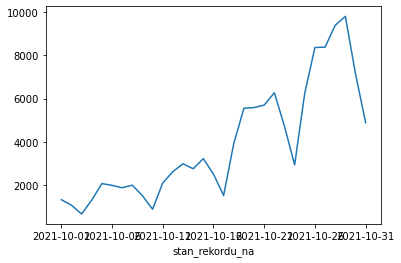

In [11]:
# new data frame
df_new = df_p[df_p['wojewodztwo'] == 'Cały kraj'].set_index('stan_rekordu_na')

# daily cases for whole country
df_new['liczba_przypadkow'].plot()

In [12]:
# drop records
df_p = df_p[df_p['wojewodztwo'] != 'Cały kraj']

# select 1,2 and last column
df_p = df_p.iloc[:, [0,1,-1]]

# overall information of data frame
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 1 to 526
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   wojewodztwo        496 non-null    object
 1   liczba_przypadkow  496 non-null    int64 
 2   stan_rekordu_na    496 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.6+ KB


In [13]:
# check number of unique voivodeships in data frame per day
df_p.groupby(by='stan_rekordu_na')['wojewodztwo'].nunique()

# optional method using a pivot table
#df_p.pivot_table(index='stan_rekordu_na', aggfunc=lambda x: len(x.unique()))

stan_rekordu_na
2021-10-01    16
2021-10-02    16
2021-10-03    16
2021-10-04    16
2021-10-05    16
2021-10-06    16
2021-10-07    16
2021-10-08    16
2021-10-09    16
2021-10-10    16
2021-10-11    16
2021-10-12    16
2021-10-13    16
2021-10-14    16
2021-10-15    16
2021-10-16    16
2021-10-17    16
2021-10-18    16
2021-10-19    16
2021-10-20    16
2021-10-21    16
2021-10-22    16
2021-10-23    16
2021-10-24    16
2021-10-25    16
2021-10-26    16
2021-10-27    16
2021-10-28    16
2021-10-29    16
2021-10-30    16
2021-10-31    16
Name: wojewodztwo, dtype: int64

In [14]:
# create new id in data frame by matching with id from geojson
df_p['id'] = df_p['wojewodztwo'].apply(lambda x: wojew_id_map[x])

df_p.head()

,wojewodztwo,liczba_przypadkow,stan_rekordu_na,id
1,dolnośląskie,68,2021-10-01,8
2,kujawsko-pomorskie,63,2021-10-01,6
3,lubelskie,254,2021-10-01,15
4,lubuskie,15,2021-10-01,16
5,łódzkie,59,2021-10-01,13


In [15]:
fig_covid = px.choropleth(data_frame=df_p,
                          geojson=wojewodztwa,
                          locations=df_p['id'],
                          color=df_p['liczba_przypadkow'],
                          color_continuous_scale='Sunset',
                          hover_name=df_p['wojewodztwo'],
                          labels={'liczba_przypadkow': 'Cases', 'stan_rekordu_na': 'Date'},
                          height=700,
                          title='New Cases of COVID-19 per Day in October 2021',
                          animation_frame=df_p['stan_rekordu_na'])

fig_covid.update_geos(fitbounds='locations', visible=False, scope='europe')

# disable zooming and remove floating menu
config = {'scrollZoom': False, 'displayModeBar': False}

# save to html file
plotly.offline.plot(fig_covid, filename='figure_covid.html', config=config)

'figure_covid.html'

Due to it's animation feature and interactive functions the plot has been exported to HTML file and can be open in any browser.

To be continued in part 2.